<a href="https://colab.research.google.com/github/lanyu0322/PUS2020_LYu/blob/master/HW3/citybike_Lan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__  import print_function, division
import pylab as plt
import pandas as pd
import numpy as np

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


IDEA:

Women are less likely than men to bike for a long time.

Althernative hypothesis: 
The proportion of men biking more than 30 minus is less than the proportion of women biking more than 30 minutes.


Null hypothesis: 

The proportion of men biking more than 30 minus is the same or higher than the proportion of women biking more than 30 minutes.

# _$H_0$_ : $\frac{W_{\mathrm{morethan30mins}}}{W_{\mathrm{total}}} <= \frac{M_{\mathrm{morethan30mins}}}{M_{\mathrm{total}}}$
# _$H_1$_ : $\frac{W_{\mathrm{morethan30mins}}}{W_{\mathrm{total}}} > \frac{M_{\mathrm{morethan30mins}}}{M_{\mathrm{total}}}$

## I will use a significance level  $\alpha=0.05$

#### which means i want the probability of getting a result at least as significant as mine to be less then 5%


I am starting with a single month of data: reading data from citibike csv file from May 2019

In [2]:
datestring = '201905'
cbMay19 = pd.read_csv("https://s3.amazonaws.com/tripdata/"+ datestring + "-citibike-tripdata.csv.zip")

In [3]:
cbMay19.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1
1,754,2019-05-01 00:00:03.0210,2019-05-01 00:12:37.6920,3258,W 27 St & 10 Ave,40.750182,-74.002184,3255,8 Ave & W 31 St,40.750585,-73.994685,25560,Customer,1969,0
2,2308,2019-05-01 00:00:04.6270,2019-05-01 00:38:33.1710,3093,N 6 St & Bedford Ave,40.717452,-73.958509,3676,Van Brunt St & Van Dyke St,40.675833,-74.014726,33369,Subscriber,1978,1
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1


In [4]:
cbMay19.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [5]:
#keep columns that needed
cbMay19 = cbMay19[["starttime", "stoptime", "gender"]]
cbMay19["date"] = pd.to_datetime(cbMay19.starttime)

# calculate the length of biking
cbMay19["length"] = pd.to_datetime(cbMay19['stoptime']) - pd.to_datetime(cbMay19['starttime'])


In [6]:
# Lets separate males (m) from females (w) to test the hypotheses. 
# In this csv file gender == 1 is male, gender == 2 is female (0 is missing value) Lets plot the number of trips per week day
cbm = cbMay19[cbMay19["gender"] == 1]
cbw = cbMay19[cbMay19["gender"] == 2]

the mean of women biking time more than 30 minutes is 69.516 minutes
the median of women biking time more than 30 minutes is 37.233 minutes
the standard deviation of women biking time more than 30 minutes is 597.77 minutes


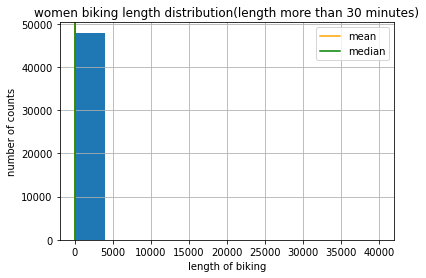

In [7]:
#  visualiza data 

mins_w = cbw["length"][cbw["length"] > '00:30:00.000000'] / np.timedelta64(1, 'm')
mean_w = mins_w.mean()
median_w = mins_w.median()
std_w = mins_w.std()

ax = mins_w.hist(bins = 10)
ax.axvline(x=mean_w, c="orange", label="mean")
ax.axvline(x=median_w, c="green", label="median")
ax.set_xlabel("length of biking")
ax.set_ylabel("number of counts")
ax.legend();
plt.title("women biking length distribution(length more than 30 minutes)")

print("the mean of women biking time more than 30 minutes is {mean_w} minutes".format(mean_w = round(mean_w, 3)))
print("the median of women biking time more than 30 minutes is {median_w} minutes".format(median_w = round(median_w, 3)))
print("the standard deviation of women biking time more than 30 minutes is {std_w} minutes".format(std_w = round(std_w, 3)))


Figure Caption: the above figure indicates the distribution of women biking time more than 30 minutes. The xlabel is the length of biking and the ylabel is the number of counts. Most of the biking length are concentrated between 0-5000minutes. Since mean value is larger than median value, the distribution is positive skew and the mass of the distribution is concentrated on the left of the figure.

the mean of women biking time more than 30 minutes(only keep the data less than 120mins) is 41.279 minutes
the median of women biking time more than 30 minutes(only keep the data less than 120mins) is 36.968 minutes
the standard deviation of women biking time more than 30 minutes(only keep the data less than 120mins) is 13.54 minutes


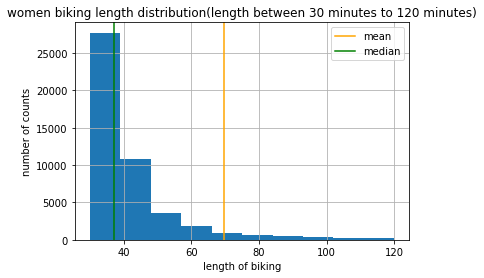

In [8]:
# since it is hard to see the distribution, lets only keep the data less than 120 and see the distribution
ax = mins_w[mins_w < 120].hist(bins = 10)
mean_w_lessthan120 = mins_w[mins_w < 120].mean()
median_w_lessthan120 = mins_w[mins_w < 120].median()
std_w_lessthan120 = mins_w[mins_w < 120].std()
ax.axvline(x=mean_w, c="orange", label="mean")
ax.axvline(x=median_w, c="green", label="median")
ax.set_xlabel("length of biking")
ax.set_ylabel("number of counts")
ax.legend();
plt.title("women biking length distribution(length between 30 minutes to 120 minutes)")

print("the mean of women biking time more than 30 minutes(only keep the data less than 120mins) is {mean_w} minutes".format(mean_w = round(mean_w_lessthan120, 3)))
print("the median of women biking time more than 30 minutes(only keep the data less than 120mins) is {median_w} minutes".format(median_w = round(median_w_lessthan120, 3)))
print("the standard deviation of women biking time more than 30 minutes(only keep the data less than 120mins) is {std_w} minutes".format(std_w = round(std_w_lessthan120, 3)))

Figure Caption: the above figure only showed the data less than 120mins. The xlabel is the length of biking and the ylabel is the number of counts. Since mean value is larger than median value, the distribution is positive skew. Compared to the previous image, the mean value has decreased a lot (from 70 minutes to 41 minutes). But the median value does not change much, which is because the mass of the distribution is concentrated on the left of the figure. 

the mean of women biking time no more than 30 minutes is 12.336 minutes
the median of women biking time no more than 30 minutes is 10.743 minutes
the standard deviation of women biking time no more than 30 minutes is 7.131 minutes


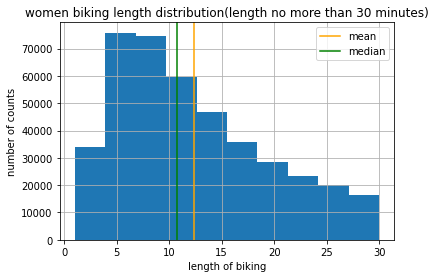

In [9]:
mins_w_nomorethan30 = cbw["length"][cbw["length"] <= '00:30:00.000000'] / np.timedelta64(1, 'm')
mean_w_nomorethan30 = mins_w_nomorethan30.mean()
median_w_nomorethan30 = mins_w_nomorethan30.median()
std_w_nomorethan30 = mins_w_nomorethan30.std()

ax = mins_w_nomorethan30.hist(bins = 10)
ax.axvline(x=mean_w_nomorethan30, c="orange", label="mean")
ax.axvline(x=median_w_nomorethan30, c="green", label="median")
ax.set_xlabel("length of biking")
ax.set_ylabel("number of counts")
ax.legend();
plt.title("women biking length distribution(length no more than 30 minutes)")

print("the mean of women biking time no more than 30 minutes is {mean_w} minutes".format(mean_w = round(mean_w_nomorethan30, 3)))
print("the median of women biking time no more than 30 minutes is {median_w} minutes".format(median_w = round(median_w_nomorethan30, 3)))
print("the standard deviation of women biking time no more than 30 minutes is {std_w} minutes".format(std_w = round(std_w_nomorethan30, 3)))


Figure Caption: The above figure indicates the distribution of counts for women biking length no more than 30 minutes. The xlabel is the length of biking and the ylabel is the number of counts. Since mean value is larger than median value, the distribution is positive skew. 

the mean of men biking time more than 30 minutes is 69.535 minutes
the median of men biking time more than 30 minutes is 36.746 minutes
the standard deviation of men biking time more than 30 minutes is 635.05 minutes


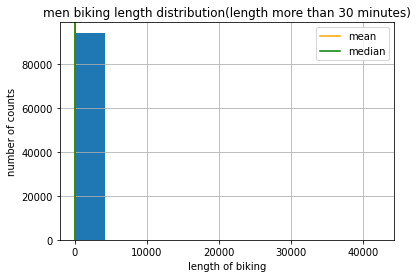

In [10]:

mins_m = cbm["length"][cbm["length"] > '00:30:00.000000'] / np.timedelta64(1, 'm')
mean_m = mins_m.mean()
median_m = mins_m.median()
std_m = mins_m.std()

ax = mins_m.hist(bins = 10)
ax.axvline(x=mean_m, c="orange", label="mean")
ax.axvline(x=median_m, c="green", label="median")
plt.title("men biking length distribution(length more than 30 minutes)")
ax.set_xlabel("length of biking")
ax.set_ylabel("number of counts")
ax.legend();

print("the mean of men biking time more than 30 minutes is {mean_m} minutes".format(mean_m = round(mean_m, 3)))
print("the median of men biking time more than 30 minutes is {median_m} minutes".format(median_m = round(median_m, 3)))
print("the standard deviation of men biking time more than 30 minutes is {std_m} minutes".format(std_m = round(std_m, 3)))


Figure Caption: the above figure indicates the distribution of men biking time more than 30 minutes. The xlabel is the length of biking and the ylabel is the number of counts. Most of the biking length are concentrated between 0-10000minutes. Since mean value is larger than median value, the distribution is positive skew and the mass of the distribution is concentrated on the left of the figure.

the mean of men biking time more than 30 minutes(only keep the data less than 120mins) is 40.128 minutes
the median of men biking time more than 30 minutes(only keep the data less than 120mins) is 36.531 minutes
the standard deviation of men biking time more than 30 minutes(only keep the data less than 120mins) is 12.234 minutes


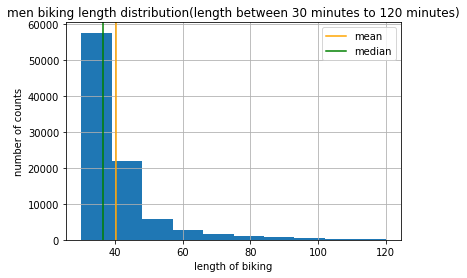

In [11]:
# since it is hard to see the distribution, lets only keep the data less than 120 and see the distribution

mean_m_lessthan120 = mins_m[mins_m < 120].mean()
median_m_lessthan120 = mins_m[mins_m < 120].median()
std_m_lessthan120 = mins_m[mins_m < 120].std()

ax = mins_m[mins_m < 120].hist(bins = 10)
ax.axvline(x=mean_m_lessthan120, c="orange", label="mean")
ax.axvline(x=median_m_lessthan120, c="green", label="median")
plt.title("men biking length distribution(length between 30 minutes to 120 minutes)")
ax.set_xlabel("length of biking")
ax.set_ylabel("number of counts")
ax.legend();

print("the mean of men biking time more than 30 minutes(only keep the data less than 120mins) is {mean_m} minutes".format(mean_m = round(mean_m_lessthan120, 3)))
print("the median of men biking time more than 30 minutes(only keep the data less than 120mins) is {median_m} minutes".format(median_m = round(median_m_lessthan120, 3)))
print("the standard deviation of men biking time more than 30 minutes(only keep the data less than 120mins) is {std_m} minutes".format(std_m = round(std_m_lessthan120, 3)))

Figure Caption: the above figure only showed the data less than 120mins. The xlabel is the length of biking and the ylabel is the number of counts. Since mean value is larger than median value, the distribution is positive skew.Compared to the previous image, the mean value has decreased a lot (from 70 minutes to 40 minutes). But the median value does not change much, which is because the mass of the distribution is concentrated on the left of the figure.
Moreover, the mean and median value does not change much. Compared to women, the median value of man is a little bit smaller than the median value of women, and the mean value of man is a little bit smaller than the mean value of women. 

the mean of men biking time no more than 30 minutes is 10.915 minutes
the median of men biking time no more than 30 minutes is 9.1 minutes
the standard deviation of men biking time no more than 30 minutes is 6.843 minutes


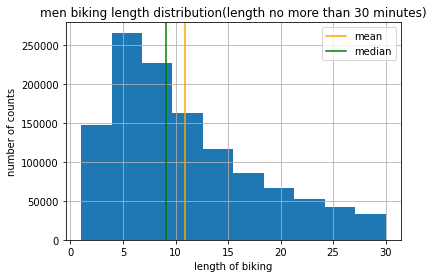

In [12]:
mins_m_nomorethan30 = cbm["length"][cbm["length"] <= '00:30:00.000000'] / np.timedelta64(1, 'm')
mean_m_nomorethan30 = mins_m_nomorethan30.mean()
median_m_nomorethan30 = mins_m_nomorethan30.median()
std_m_nomorethan30 = mins_m_nomorethan30.std()

ax = mins_m_nomorethan30.hist(bins = 10)
ax.axvline(x=mean_m_nomorethan30, c="orange", label="mean")
ax.axvline(x=median_m_nomorethan30, c="green", label="median")
ax.set_xlabel("length of biking")
ax.set_ylabel("number of counts")
ax.legend();
plt.title("men biking length distribution(length no more than 30 minutes)")

print("the mean of men biking time no more than 30 minutes is {mean_m} minutes".format(mean_m = round(mean_m_nomorethan30, 3)))
print("the median of men biking time no more than 30 minutes is {median_m} minutes".format(median_m = round(median_m_nomorethan30, 3)))
print("the standard deviation of men biking time no more than 30 minutes is {std_m} minutes".format(std_m = round(std_m_nomorethan30, 3)))

The above figure indicates the distribution of counts for men biking length no more than 30 minutes. The xlabel is the length of biking and the ylabel is the number of counts. Since mean value is larger than median value, the distribution is positive skew.

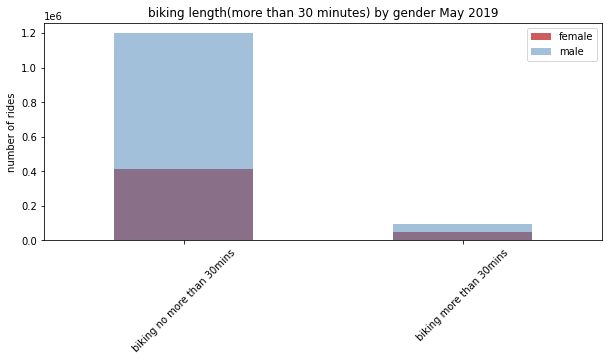

In [13]:
# calculate the counts 
counts_w = cbw["length"].groupby([cbw["length"] > '00:30:00.000000']).count()
counts_m = cbm["length"].groupby([cbm["length"] > '00:30:00.000000']).count()

plt.figure(figsize=(10, 4))
ax = counts_w.plot(kind="bar", color='IndianRed', label='female')
ax = counts_m.plot(kind="bar", color='SteelBlue', alpha=0.5,label='male', ax=ax)
ax.xaxis.set_ticklabels(['biking no more than 30mins', 'biking more than 30mins'], rotation = 45)

plt.title("biking length(more than 30 minutes) by gender May 2019");
plt.ylabel("number of rides");
plt.xlabel("");
plt.legend(loc = "upper right")

Figure Caption: this figure indicated the biking length by gender. From the figure, it shows that more people are biking no more than 30mins. The number of man biking no more than 30mins is larger than the number of women biking no more than 30mins. For biking more than 30mins, it is not obvious in this figure.

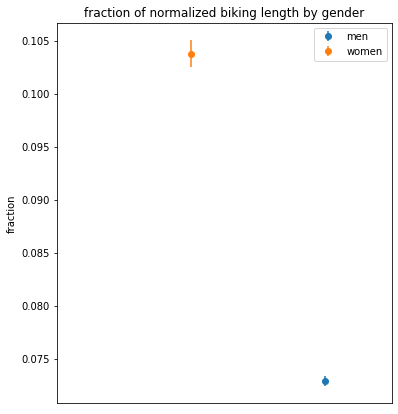

In [61]:
# prepare the fraction of data
p_w = counts_w[1]/len(cbw)
p_m =counts_m[1]/len(cbm)

error_w = std_w/len(cbw)
error_m = std_m/len(cbm)

fig = plt.figure(figsize=(6, 7))
plt.errorbar([0.4], [p_m], yerr=[error_m], fmt='o', label='men')
plt.errorbar([0.2], [p_w], yerr=[error_w], fmt='o', label='women')
plt.ylabel("fraction")
plt.title("fraction of normalized biking length by gender")
plt.xticks([])
plt.xlim(0, 0.5)
plt.legend();

### Is the percentage of women that ride on weekends lower or equal to that of man?
## The statistics is: 
# $z = \frac{(p_0 - p_1)}{SE} $
# $p =\frac{p_0  n_0 + p_1  n_1}{n_0+n_1}$
# $SE = \sqrt{ p  ( 1 - p )  (\frac{1}{n_0} + \frac{1}{n_1}) }$
## and in this notation 
# $p_0 = \frac{W_{\mathrm{morethan30mins}}}{W_{\mathrm{total}}}$
### and 
# $p_1 = \frac{M_{\mathrm{morethan30mins}}}{M_{\mathrm{total}}}$


In [ ]:
P0mP1 = p_w - p_m
print ("difference between man and women on weekend: {:.2f}".format(P0mP1))
if P0mP1 <= 0:
    # we are done...
    print("In accordance with Null Hypothesis")
else:
    # morework to do
    print ("We must check the significance before we reject the Null Hypothesis")

difference between man and women on weekend: 0.03
We must check the significance before we reject the Null Hypothesis


In [ ]:
def ztest_p(p0, p1, n0, n1): 
  return (p0 * n0 + p1 * n1) / (n0 + n1)
def ztest_se(p0, p1, n0, n1):
  p = ztest_p(p0, p1, n0, n1)
  return np.sqrt(p * (1 - p) * (1.0 / n0 + 1.0 / n1)) #standard error
def zscore(p0, p1, n0, n1) : 
  return (p0 - p1) / ztest_se(p0, p1, n0, n1)

# calculations

z = zscore(p_w, p_m, len(cbw), len(cbm))
print ("The z statistics is %.2f"%z) 

The z statistics is 65.96


## The largest number reported in  z stats tables is 3, which gives  a p value
## $p <0.0002$, which is smaller then my chosen $\alpha=0.05$ - so yes, it is statistically significant 

# Let's check the _effect size_: 
# there are 2 formulae I find in the literature
# $r = \frac{z}{\sqrt{(n_0+n_1)}}$
# and
# $h =  2 (\arcsin \sqrt{p_0} -  \arcsin \sqrt{p_1} )$. https://en.wikipedia.org/wiki/Cohen%27s_h

In [ ]:
def r_effectsize (z, n0, n1) :
  return z / np.sqrt(n0 + n0)
def h_effectsize (p0, p1): 
  return 2 * (np.arcsin(np.sqrt(p0)) - np.arcsin(np.sqrt(p1)))

In [ ]:
r = r_effectsize(z, len(cbw), len(cbm))
print ('r effect size {:.2f}'.format(r))

r effect size 0.07


In [ ]:
h = h_effectsize(p_w, p_m)
print ("Cohen's h effect size {:.2f}".format(h))

Cohen's h effect size 0.11


In all these cases we have SMALL EFFECT SIZE